Data Questions We will answer:

1) Determining whether actors that have worked on both TV shows and Movies are better at one or the other based on ratings

2) Determining whether or not there is a pattern between the ratings of movies and the year in which they were made

3) Determining the best actors based on the ratings of movies

4) Top 10 movies of each actor based on ratings

5) Finding a correlation between the age of actors and the ratings that they recieve

6) Determing the top rated genre

In [5]:
# Import Statements for Various Packages
import pandas as pd;
import sqlalchemy as SQL;
import json

In [10]:
def getCreds(filename,subset,defaults={}):
    '''
    This function helps us connect to a database on hadoop2.  The
    userid password information is stored in a local file encoded
    in json format.  
    Inputs:
        filename is where json encoded userid/password information stored
        subset : dictionary key in json file
        defaults : alternative way to connect to database
    Returns subdictionary based on subset parameter.
    '''
    try:
        with open(filename,'r') as file:
            D = json.load(file)
            file.close()
            if D[subset]:
                return D[subset]
            else:
                return defaults
    except:
        return defaults
    
creds = getCreds('creds.json','mysql',defaults = {'user':'studen_j1', 'password':'studen_j1'})
print(creds)
    
def db_setup(userid,password,database):
    '''
    This function connects us to a database using our login credentials. 
    Paramters:
        userid - string with our userid
        password - string with our password
        database - string with database name
    Return Value:
        SQL engine and SQL connection objects
    '''
    template = 'mysql+mysqlconnector://{}:{}@hadoop2.mathsci.denison.edu/{}'
    cstring = template.format(userid,password,database)
    engine = SQL.create_engine(cstring)
    connection = engine.connect()
    
    return engine, connection
    
creds = getCreds('creds.json','mysql',defaults = {'user':'studen_j1', 'password':'studen_j1'})

{'user': 'basnet_p1', 'password': 'basnet_p1'}


In [16]:
creds = getCreds('creds.json','mysql',defaults = {'user':'studen_j1', 'password':'studen_j1'})
database = 'imdb2'

try:
    connection.close()
    del engine
except:
    pass
engine, connection = db_setup(creds['user'],creds['password'],database)

In [13]:
#resultproxy = connection.execute(getCustomers)  
#custBellevue = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 

In [34]:
getMovies = "select Mo.MovieTitle, Mo.MovieAvgRating from Movies as Mo where Mo.MovieAvgRating > 7.5;"
resultproxy = connection.execute(getMovies)
MoviesRatings = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 


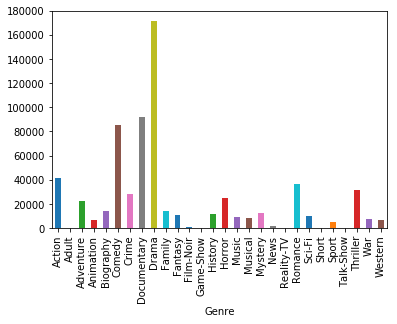

In [29]:
#This query calculates the total number of movies in each genre and creates the bar graph with total movies made from each genre
import numpy as np
import matplotlib.pyplot as pyplot

getCount = "select Mo.MovieTitle, Ge.Genre from Movies as Mo inner join Movie_Genre as MoGe on Mo.MovieID = MoGe.MovieID inner join Genres as Ge on Ge.GenreID = MoGe.GenreID"
resultproxy = connection.execute(getCount)
MoviesCount = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 
grouped = MoviesCount.groupby(by = 'Genre').agg('count')
pyplot.figure()
grouped.loc[:, 'MovieTitle'].plot(kind = 'bar')
pyplot.show()




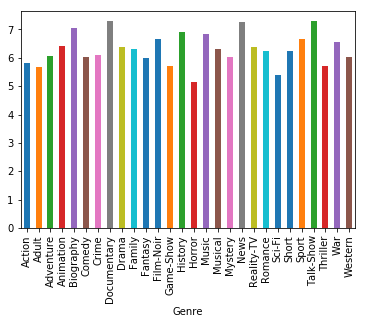

In [33]:
#This query calculates the average ratings of each genre and creates a bar graph using that data
getRatings = "select Mo.MovieTitle, Ge.Genre, Mo.MovieAvgRating from Movies as Mo inner join Movie_Genre as MoGe on Mo.MovieID = MoGe.MovieID inner join Genres as Ge on Ge.GenreID = MoGe.GenreID"
resultproxy = connection.execute(getRatings)
GenresRatings = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 
avgRatings = GenresRatings.groupby(by = 'Genre').agg('mean')

pyplot.figure()
avgRatings.loc[:, 'MovieAvgRating'].plot(kind = 'bar')
pyplot.show()


In [63]:
getYears = "select Mo.MovieTitle, Mo.ReleaseYear, Mo.MovieAvgRating from Movies as Mo"
resultproxy = connection.execute(getYears)
Ratings_Per_Year = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 
avg_Year_Ratings = Ratings_Per_Year.groupby(by = 'ReleaseYear').agg('mean')
avg_Year_Ratings = avg_Year_Ratings.sort_values('MovieAvgRating', ascending = False)
avg_Year_Ratings = avg_Year_Ratings.reset_index()

pyplot.figure()

#axes = avg_Year_Ratings.loc[avg_Year_Ratings['MovieAvgRating'] < 3.5 ,:].plot.scatter(x = 'MovieAvgRating', y = 'ReleaseYear', color = 'red',label='BW',s=100)
#avg_Year_Ratings.loc[avg_Year_Ratings['MovieAvgRating'] > 4.5 ,:].plot.scatter(x = 'MovieAvgRating', y = 'ReleaseYear', color='yellow',label='BW',ax=axes,s=100)
#avg_Year_Ratings.loc[avg_Year_Ratings['MovieAvgRating'] <= 5.5,:].plot.scatter(x = 'MovieAvgRating', y = 'ReleaseYear', color='yellow',label='BW',ax=axes,s=100)
#avg_Year_Ratings.loc[avg_Year_Ratings['MovieAvgRating'] <= 5.5,:].plot.scatter(x = 'MovieAvgRating', y = 'ReleaseYear', color='yellow',label='BW',ax=axes,s=100)
#avg_Year_Ratings.loc[avg_Year_Ratings['MovieAvgRating'] <= 5.5,:].plot.scatter(x = 'MovieAvgRating', y = 'ReleaseYear', color='yellow',label='BW',ax=axes,s=100)


pyplot.show()

ValueError: scatter requires x column to be numeric

<Figure size 432x288 with 0 Axes>